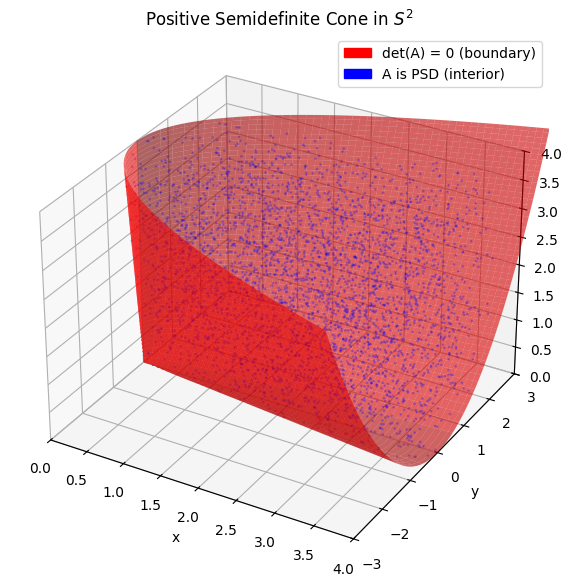

In [ ]:
# Question 5. (a)

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Patch

# create grid
x = np.linspace(0,4,200)
z = np.linspace(0,4,200)
X,Z = np.meshgrid(x,z)

# boundary surface : xz-y^2 = 0, x>=0 , z>=0
Y_pos = np.sqrt(X*Z)
Y_neg = -np.sqrt(X*Z)

# plot
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111,projection='3d')

# boundary surfaces
ax.plot_surface(X,Y_pos,Z,alpha=0.6,color='red',linewidth=0,label='det(A) = 0')
ax.plot_surface(X,Y_neg,Z,alpha=0.6,color='red',linewidth=0)

# sampled interior points
num_points = 5000
x_int = np.random.uniform(0,4,num_points)
z_int = np.random.uniform(0,4,num_points)
y_int = np.random.uniform(-2,2,num_points)
mask = (x_int*z_int - y_int**2 > 0)
ax.scatter(x_int[mask],y_int[mask],z_int[mask],s=1,color='blue',alpha=0.2,label='A is PSD')

# labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Positive Semidefinite Cone in $S^2$')
ax.set_xlim(0,4)
ax.set_ylim(-3,3)
ax.set_zlim(0,4)

legend_elements = [
    Patch(facecolor='red',edgecolor='red',label='det(A) = 0 (boundary)'),
    Patch(facecolor='blue',edgecolor='blue',label='A is PSD (interior)')
    ]
ax.legend(handles=legend_elements)

plt.show()

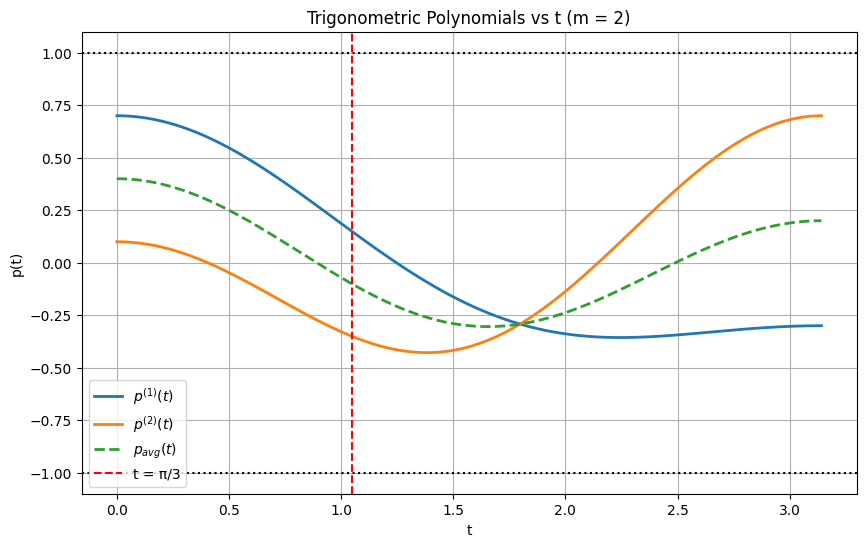

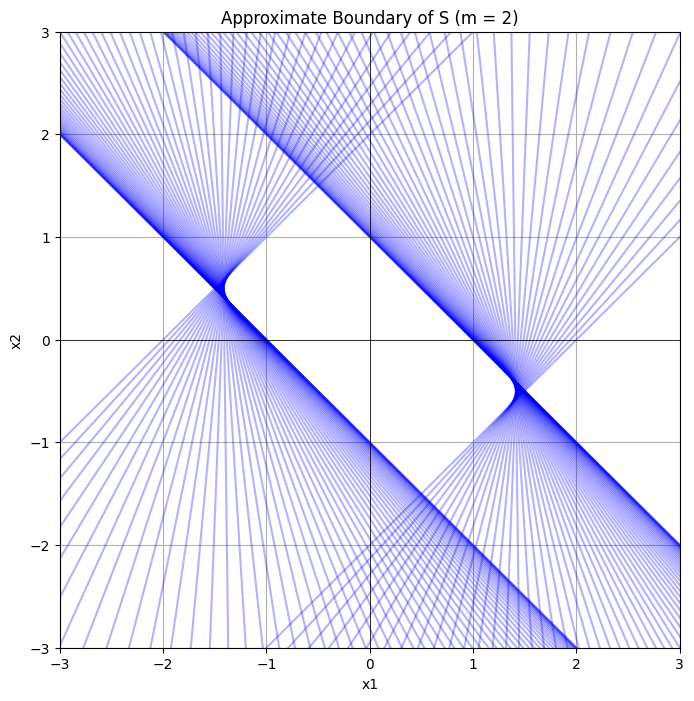

In [4]:
# Question 8. (b)
import numpy as np
import matplotlib.pyplot as plt


m = 2
t_plot = np.linspace(0,np.pi,1000)
t_slabs = np.linspace(0,np.pi/3,60)

x1 = np.array([0.5,0.2])
x2 = np.array([-0.3,0.4])

# define p(t)
def p(t,x):
    return x[0]*np.cos(t) + x[1]*np.cos(2*t)

# compute curves
p1 = p(t_plot, x1)
p2 = p(t_plot, x2)
p_avg = 0.5*(p1 + p2)

# trig polynomaials vs t
plt.figure(figsize=(10,6))

plt.plot(t_plot,p1,label='$p^{(1)}(t)$',linewidth=2)
plt.plot(t_plot,p2,label='$p^{(2)}(t)$',linewidth=2)
plt.plot(t_plot,p_avg,'--',label='$p_{avg}(t)$',linewidth=2)

# horizontal lines y = 1 , y = -1
plt.axhline(1,color='black',linestyle=':')
plt.axhline(-1,color='black',linestyle=':')

# vertical line t = pi/3
plt.axvline(np.pi/3,color='red',linestyle='--',label='t = π/3')

plt.xlabel('t')
plt.ylabel('p(t)')
plt.title('Trigonometric Polynomials vs t (m = 2)')
plt.legend()
plt.grid(True)

plt.show()


# plot 2 - feasible region boundary
plt.figure(figsize=(8,8))

# x-axis range for plotting lines
x1_vals = np.linspace(-3,3,400)

for t in t_slabs:
    a1 = np.cos(t)
    a2 = np.cos(2*t)
    if abs(a2) > 1e-6:
        # +1 boundary
        x2_vals_plus = (1-a1*x1_vals)/a2
        plt.plot(x1_vals,x2_vals_plus,color='blue',alpha=0.3)
        # -1 boundary
        x2_vals_minus = (-1-a1*x1_vals)/a2
        plt.plot(x1_vals,x2_vals_minus,color='blue',alpha=0.3)
    else:
        if abs(a1) > 1e-6:
            x1_plus = 1/a1
            x1_minus = -1 /a1
            plt.axvline(x1_plus,color='blue',alpha=0.3)
            plt.axvline(x1_minus,color='blue',alpha=0.3)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Approximate Boundary of S (m = 2)')
plt.axhline(0,color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()
